In [13]:
import numpy as np
import matplotlib.pyplot as plt

Given:
* $N$, the number of cards in the deck
* $p \le N$, the number of permanent cards in the deck
* $s=N-p$ the number of non-permanent cards in the deck

The probability of flipping exactly $K$ permanent cards followed by a non-permanent is:

$$P(K) = \frac{p}{N} \times \frac{p-1}{N-1} \times \dots \times \frac{p-K-1}{N-K-1} \times \frac{S}{N-K} = \Pi_{k=0}^{K-1} \frac{p-k}{N-k} \times \frac{S}{N-K}$$

In [216]:
def P(N, p, K):
    if p > N:
        raise ValueError("p must be less than N")
    if p == N:
        return 1 if k == p else 0
    s = N - p
    values = []
    for k in range(0,K):
        values.append((p-k)/(N-k))
    values.append(s/(N-K))
    return np.prod(values)

In [217]:
N = 99
p = 85
ks = np.linspace(0, p, p+1, dtype=np.int64)
Ps = [P(N, p, k) for k in ks]
ev = np.matmul(ks, Ps)
var = np.sum([P * (k-ev)**2 for k, P in zip(ks,Ps)])

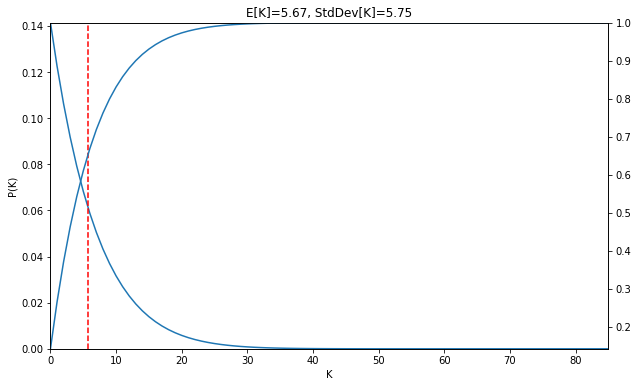

In [218]:
fig, ax = plt.subplots(figsize=(10, 6))

ax_2 = ax.twinx()

ax.plot(ks, Ps)
ax_2.plot(ks, np.cumsum(Ps))
ax.set(
    title = f'E[K]={ev:.2f}, StdDev[K]={var**(1/2):.2f}',
    xlabel ='K',
    ylabel ='P(K)',
    ylim =(np.min(Ps), np.max(Ps)),
    xlim = (0, p)
)
ax_2.set(
    ylim = (Ps[0], 1)
)
ax.vlines(ev, np.min(Ps), np.max(Ps), colors=['r'], linestyle=['dashed']);